<a href="https://colab.research.google.com/github/Jun-629/20MA573/blob/master/src/bsm_price_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Consider** an european option with
- call type
- strike = 110
- maturity = T
underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.

- Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

- Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

- Describe your observations. Do you think the same behavior is also true for put?

- Could you prove your observations?

In [0]:
import scipy.stats as stats

class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'   -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price

class Gbm:
    def __init__(self, init_state = 100., drift_ratio = .0475, vol_ratio = .2):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * stats.norm.cdf(otype * d1) - otype * np.exp(-r * maturity) * k * stats.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

**Soln:**
- Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

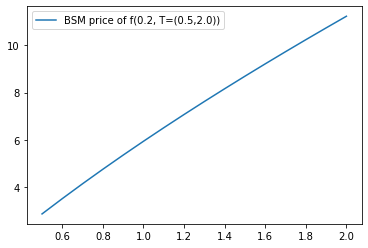

In [9]:
import numpy as np
import matplotlib.pyplot as plt

T = np.arange(0.5,2.1,0.1)
gbm1 = Gbm()
option1 = VanillaOption(otype=1, strike=110, maturity=T)
BS_price1 = gbm1.bsm_price(option1)

plt.plot(T, BS_price1, label = 'BSM price of f(0.2, T=(0.5,2.0))')
plt.legend()

- Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

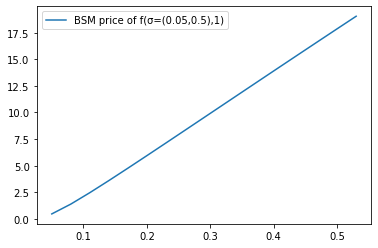

In [10]:
sigma = np.arange(0.05, 0.53, 0.03)

gbm2 = Gbm(100., .0475, sigma)
option2 = VanillaOption()
BS_price2 = gbm2.bsm_price(option2)

plt.plot(sigma, BS_price2, label = 'BSM price of f(σ=(0.05,0.5),1)')
plt.legend()

__Observation:__

**1.** For the fixed volatility $\sigma$, with the increasing of maturity time, the bsm price of call option increases.

**2.** For the fixed time, with the increasing of volatility $\sigma$, the bsm price of call option increases.

The put option shares the same conclusion in **observation 2.** as the call option.

__Pf:__

Firstly, we will show the counter example of **observation 1.** for the put option.

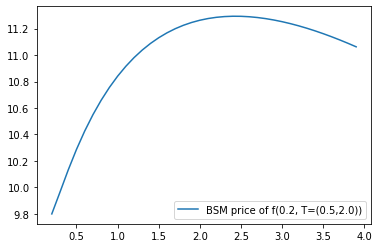

In [11]:
T = np.arange(0.2,4.,0.1)
gbm1 = Gbm()
option3 = VanillaOption(otype=-1, strike=110, maturity=T)
BS_price1 = gbm1.bsm_price(option3)

plt.plot(T, BS_price1, label = 'BSM price of f(0.2, T=(0.5,2.0))')
plt.legend()

The plot shows that when maturity time is big enough, the bsm price of put option will decrease as the maturity time increases.

Now we will prove the **observation 1.** and the same conclusion for the put option.

Due to the Put-Call parity $$C_t - P_t =  S(t) - Ke^{-r(T-t)} ,$$
when $C_t$ increases as the volatility increases, $P_t$ has to increase since $S(t) - Ke^{-r(T-t)}$ is a constant, which means that we just need to prove the **observation 1.**.

$$C_t = \mathbb E [e^{-r(T-t)} (S(T-t) - K)^+] = S_t  \Phi(d_1) - K e^{-r(T-t)} \Phi(d_2),$$
where $d_i$ are given as
$$d_1 = \frac{(r + \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T},$$
and
$$d_2 = \frac{(r - \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T} = d_1 - \sigma \sqrt T.$$
Without loss of generality, assuming that $t = 0$, then we will have
$$C_0 = \mathbb E [e^{-rT} (S(T) - K)^+] = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
thus
\begin{equation}
\begin{split}
\frac{\partial C_0}{\partial \sigma} &= S_0 \frac{\partial \Phi(d_1)}{\partial \sigma} - K e^{-rT} \frac{\partial \Phi(d_2)}{\partial \sigma}  \\
&= S_0 \Phi'(d_1) \frac{\partial d_1}{\partial \sigma} -  K e^{-rT} \Phi'(d_2) (\frac{\partial d_1}{\partial \sigma} - \sqrt T) \\
\frac{\partial d_1}{\partial \sigma} &= \frac{1}{\sqrt T}\frac{\sigma T \cdot \sigma - [(r + \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}]}{\sigma^2} \\
&= \sqrt T - \frac{d_1}{\sigma} \\
\Phi'(d_i) &= \frac{1}{\sqrt {2\pi}}e^{-\frac{d_i^2}{2}}, i = 1,2
\end{split}
\end{equation}
then by calculation, we will have 
\begin{equation}
\begin{split}
\frac{\partial C_0}{\partial \sigma} &= \frac{1}{\sqrt {2\pi}} [S_0 \cdot e^{-\frac{d_1^2}{2}} \cdot (\sqrt T - \frac{d_1}{\sigma}) + K e^{-rT} \cdot e^{-\frac{d_1^2 - 2\sigma \sqrt T d_1 + \sigma^2 T}{2}} \cdot \frac{d_1}{\sigma}] \\
&= \frac{1}{\sqrt {2\pi}} e^{-\frac{d_1^2}{2}} [S_0 \cdot (\sqrt T - \frac{d_1}{\sigma}) + K e^{-rT} \cdot \frac{d_1}{\sigma} \cdot e^{\sigma \sqrt T d_1 - \frac{\sigma^2 T}{2}}] \\
&= \frac{1}{\sqrt {2\pi}} e^{-\frac{d_1^2}{2}} [S_0 \cdot (\sqrt T - \frac{d_1}{\sigma}) + K e^{-rT} \cdot \frac{d_1}{\sigma} \cdot e^{rT - ln{\frac{K}{S_0}}}]\\
&= \frac{1}{\sqrt {2\pi}} e^{-\frac{d_1^2}{2}} [S_0 \cdot (\sqrt T - \frac{d_1}{\sigma}) + K \cdot \frac{d_1}{\sigma} \cdot e^{ln{\frac{S_0}{K}}}] \\
&= \frac{1}{\sqrt {2\pi}} e^{-\frac{d_1^2}{2}} \cdot S_0 \cdot \sqrt T > 0
\end{split}
\end{equation}
Since every term of right hand side of the equation is positive, which means the BSM price increases with the increasing of volatility $\sigma$.

__Q.E.D.__


